# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Om Vitole

**Student ID:** 202302090016

**Date of Submission:** 6/04/2025

**Group Members**:
(1) Bhavesh Jadhav
(2) Ayush Bhalerao


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



#Part A: NLP Preprocessing


Load the Dataset & Explore It

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall("ag_news")  # you can change the folder name

In [ ]:
import pandas as pd

# Load the files directly (they are in the root folder in your case)
train_df = pd.read_csv("ag_news/train.csv")
test_df = pd.read_csv("ag_news/test.csv")

# Rename columns for clarity
train_df.columns = ["Class", "Title", "Description"]
test_df.columns = ["Class", "Title", "Description"]

# Combine title and description into one text column
train_df["text"] = train_df["Title"] + " " + train_df["Description"]
test_df["text"] = test_df["Title"] + " " + test_df["Description"]

# Explore structure
print("Missing values:\n", train_df.isnull().sum())
print("\nData types:\n", train_df.dtypes)
print("\nClass distribution:\n", train_df["Class"].value_counts())
train_df.head()

Missing values:
 Class          0
Title          0
Description    0
text           0
dtype: int64

Data types:
 Class           int64
Title          object
Description    object
text           object
dtype: object

Class distribution:
 Class
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64


,Class,Title,Description,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [ ]:
# -----------------------------------
# Step 1: Load the Dataset (AG News)
# -----------------------------------
import pandas as pd

# Load the train and test datasets (uploaded to Colab)
train_df = pd.read_csv("ag_news/train.csv")
test_df = pd.read_csv("ag_news/test.csv")

# Rename columns for clarity
train_df.columns = ["Class", "Title", "Description"]
test_df.columns = ["Class", "Title", "Description"]

# Combine title + description
train_df['text'] = train_df['Title'] + " " + train_df['Description']
test_df['text'] = test_df['Title'] + " " + test_df['Description']

# Show dataset structure
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df.head())

Train shape: (120000, 4)
Test shape: (7600, 4)
   Class                                              Title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         Description  \
0  Reuters - Short-sellers, Wall Street's dwindli...   
1  Reuters - Private investment firm Carlyle Grou...   
2  Reuters - Soaring crude prices plus worries\ab...   
3  Reuters - Authorities have halted oil export\f...   
4  AFP - Tearaway world oil prices, toppling reco...   

                                                text  
0  Wall St. Bears Claw Back Into the Black (Reute...  
1  Carlyle Looks Toward Commercial Aerospace (Reu...  
2  Oil and Economy Cloud Stocks' Outlook (Reuters...  
3  Iraq Halts Oil

Convert Text to Lowercase

In [ ]:
train_df["text"] = train_df["text"].str.lower()
test_df["text"] = test_df["text"].str.lower()
train_df["text"].head()

,text
0,wall st. bears claw back into the black (reute...
1,carlyle looks toward commercial aerospace (reu...
2,oil and economy cloud stocks' outlook (reuters...
3,iraq halts oil exports from main southern pipe...
4,"oil prices soar to all-time record, posing new..."


Tokenization using NLTK

In [ ]:
import nltk

# Download the 'punkt_tab' data
nltk.download('punkt_tab')

# Now you can use word_tokenize
from nltk.tokenize import word_tokenize

train_df["tokens"] = train_df["text"].apply(word_tokenize)
train_df["tokens"].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tokens
0,"[wall, st., bears, claw, back, into, the, blac..."
1,"[carlyle, looks, toward, commercial, aerospace..."
2,"[oil, and, economy, cloud, stocks, ', outlook,..."
3,"[iraq, halts, oil, exports, from, main, southe..."
4,"[oil, prices, soar, to, all-time, record, ,, p..."


 Remove Stopwords

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
train_df["filtered_tokens"] = train_df["tokens"].apply(lambda x: [word for word in x if word not in stop_words])
train_df["filtered_tokens"].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,filtered_tokens
0,"[wall, st., bears, claw, back, black, (, reute..."
1,"[carlyle, looks, toward, commercial, aerospace..."
2,"[oil, economy, cloud, stocks, ', outlook, (, r..."
3,"[iraq, halts, oil, exports, main, southern, pi..."
4,"[oil, prices, soar, all-time, record, ,, posin..."


Apply Stemming (PorterStemmer)

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
train_df["stemmed"] = train_df["filtered_tokens"].apply(lambda x: [stemmer.stem(word) for word in x])
train_df["stemmed"].head()

,stemmed
0,"[wall, st., bear, claw, back, black, (, reuter..."
1,"[carlyl, look, toward, commerci, aerospac, (, ..."
2,"[oil, economi, cloud, stock, ', outlook, (, re..."
3,"[iraq, halt, oil, export, main, southern, pipe..."
4,"[oil, price, soar, all-tim, record, ,, pose, n..."


Apply Lemmatization (WordNet)


In [ ]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
train_df["lemmatized"] = train_df["filtered_tokens"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
train_df["lemmatized"].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,lemmatized
0,"[wall, st., bear, claw, back, black, (, reuter..."
1,"[carlyle, look, toward, commercial, aerospace,..."
2,"[oil, economy, cloud, stock, ', outlook, (, re..."
3,"[iraq, halt, oil, export, main, southern, pipe..."
4,"[oil, price, soar, all-time, record, ,, posing..."


Vectorization - CountVectorizer and TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Join lemmatized tokens back to string
train_df["final_text"] = train_df["lemmatized"].apply(lambda x: " ".join(x))

# CountVectorizer
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(train_df["final_text"])

# TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(train_df["final_text"])

X_count.shape, X_tfidf.shape


((120000, 59655), (120000, 59655))

**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

# Part B: Model Building & Evaluation

📘 Logistic Regression
F1 Score: 0.9167
Accuracy: 0.9167 (91.67%)

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.90      0.92      5956
           2       0.95      0.98      0.97      6058
           3       0.88      0.89      0.89      5911
           4       0.90      0.89      0.90      6075

    accuracy                           0.92     24000
   macro avg       0.92      0.92      0.92     24000
weighted avg       0.92      0.92      0.92     24000



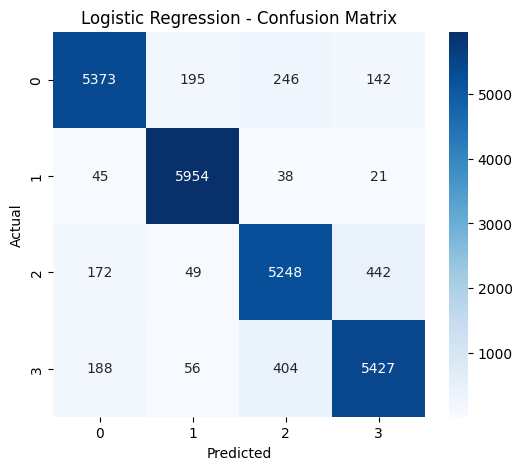


📗 Naive Bayes
F1 Score: 0.9070
Accuracy: 0.9070 (90.70%)

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.89      0.91      5956
           2       0.95      0.98      0.96      6058
           3       0.87      0.87      0.87      5911
           4       0.89      0.88      0.88      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



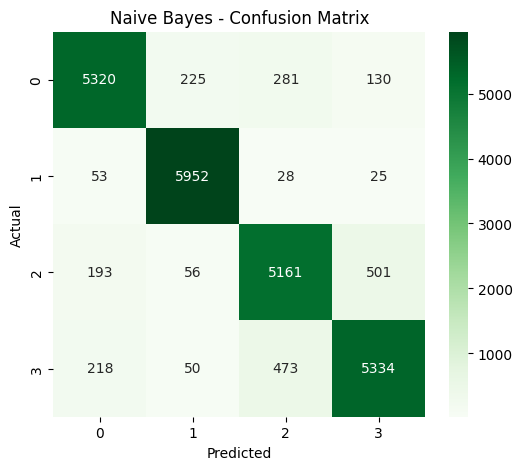

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_tfidf or X_count is your feature data and train_df['Class'] is your target variable
X = X_tfidf  # or X_count
y = train_df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # You can adjust test_size and random_state

# --- Model 1: Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

log_f1 = f1_score(y_test, log_preds, average='micro')
log_acc = accuracy_score(y_test, log_preds)

print("📘 Logistic Regression")
print(f"F1 Score: {log_f1:.4f}")
print(f"Accuracy: {log_acc:.4f} ({log_acc*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, log_preds))

# Confusion Matrix - Logistic Regression
log_cm = confusion_matrix(y_test, log_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(pd.DataFrame(log_cm), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# --- Model 2: Naive Bayes ---
nb_model = MultinomialNB(alpha=0.52)
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

nb_f1 = f1_score(y_test, nb_preds, average='micro')
nb_acc = accuracy_score(y_test, nb_preds)

print("\n📗 Naive Bayes")
print(f"F1 Score: {nb_f1:.4f}")
print(f"Accuracy: {nb_acc:.4f} ({nb_acc*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, nb_preds))

# Confusion Matrix - Naive Bayes
nb_cm = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(pd.DataFrame(nb_cm), annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("📊 Summary Comparison:\n")
print(f"Logistic Regression - Accuracy: {log_acc:.4f} | F1 Score: {log_f1:.4f}")
print(f"Naive Bayes        - Accuracy: {nb_acc:.4f} | F1 Score: {nb_f1:.4f}")

📊 Summary Comparison:

Logistic Regression - Accuracy: 0.9167 | F1 Score: 0.9167
Naive Bayes        - Accuracy: 0.9070 | F1 Score: 0.9070


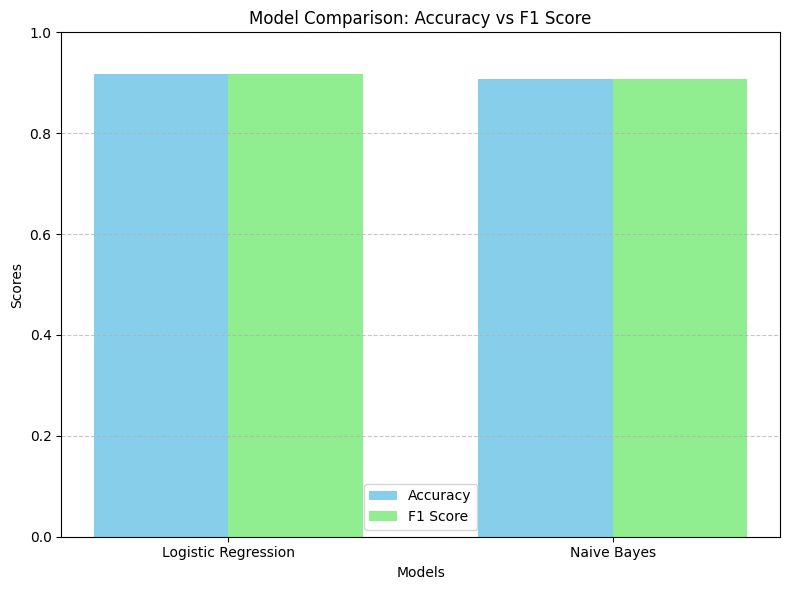

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Naive Bayes']

# Accuracy and F1 Scores
accuracies = [log_acc, nb_acc]
f1_scores = [log_f1, nb_f1]

# Plotting
x = range(len(models))
width = 0.35  # width of the bars

plt.figure(figsize=(8, 6))
plt.bar(x, accuracies, width=width, label='Accuracy', color='skyblue')
plt.bar([p + width for p in x], f1_scores, width=width, label='F1 Score', color='lightgreen')

# Add labels, title, etc.
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.xticks([p + width/2 for p in x], models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Sanika Kundekar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/meSanika07/DL_PracticalLabAssignmnent_4

Signature: Sanika Kundekar

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion